# IMPORT DEPENDENCIES

In [1383]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

# DATA COLLECTION

In [1384]:
train_data=pd.read_csv("F:\\PYTHON\\Datasets\\train.csv")

In [1385]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# DATA  ANALYSIS & VISUALIZATION

In [1386]:
x=train_data.copy()

In [1387]:
x

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1388]:

x["Sex"]=x['Sex'].apply(lambda x_value:1 if x_value=="male" else 0)
d={"C":0,"Q":1,"S":2,0:-1}
x["Embarked"]=x["Embarked"].fillna(0)
x["Embarked"]=x["Embarked"].apply(lambda x_value:d[x_value])

In [1389]:
encoder=LabelEncoder()

x["Ticket"]=encoder.fit_transform(x["Ticket"])
x["Name"]=x["Name"].apply(lambda x:1 if "Mr." in x else 0)
x["Isalone"]= (x["SibSp"]+x["Parch"]).apply(lambda x:1 if x==0 else 0)
x["Familysize"]=(x["SibSp"]+x["Parch"])
# Define age ranges for each category
child_range = (0, 17)
adult_range = (18, 64)
elderly_range = (65, 200)

median_age = x['Age'].median()
# Fill NaN values with the median age
x['Age'] = x['Age'].fillna(median_age)


x["Age"]=pd.cut(x['Age'], bins=[child_range[0], adult_range[0], elderly_range[0], elderly_range[1]], labels=[0, 1, 2], right=False)

x['Age'] = x['Age'].astype(float)

x["Fare"]=pd.cut(x["Fare"],bins=[0,50,300,550],labels=[0,1,2],right=False)
# Create a LabelEncoder object
x["Fare"]=x["Fare"].astype(float)

x['Cabin'] = x['Cabin'].astype(str)
x["Cabin"]=x["Cabin"].apply(lambda x:ord(x[0]))



In [1390]:
correlation=x.corr()

<AxesSubplot: >

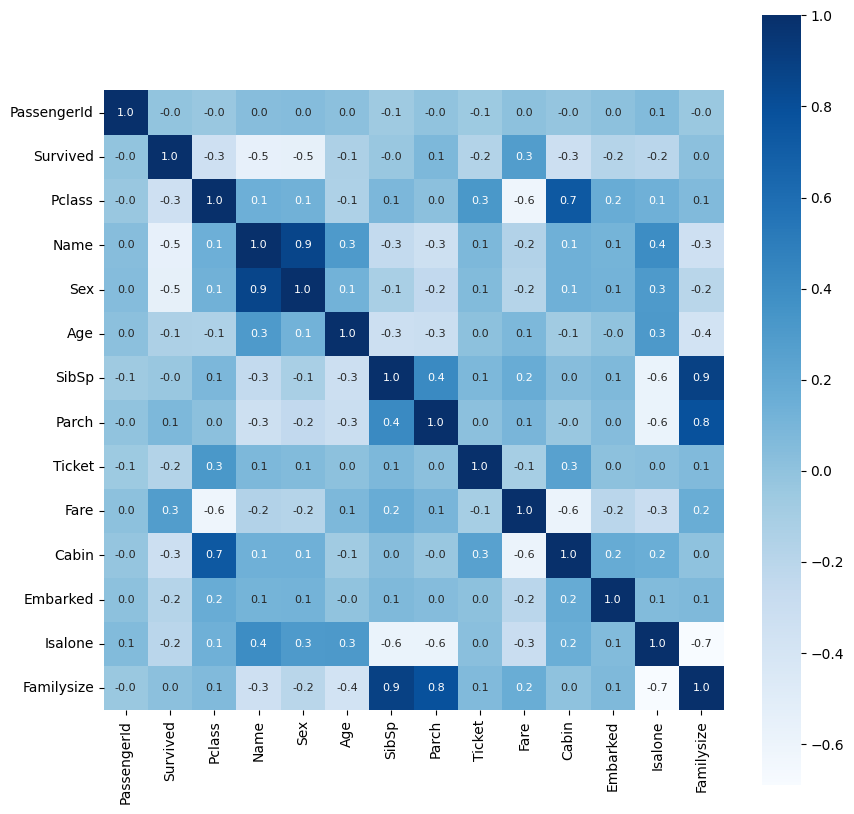

In [1391]:
#constructing  a heat map to unjderstand correlation between columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
#datset=correlation 
#cbar is the bar on the r8 side 
#the boxes should b square
#fmt = floating point size 
#annot r the labels on left side 
#annot_kws = size of the labels
#cmap = colour 
#Darker colour = Directly Prop (+ve corr)
#Lighter colour = Inversely Prop (-ve corr)

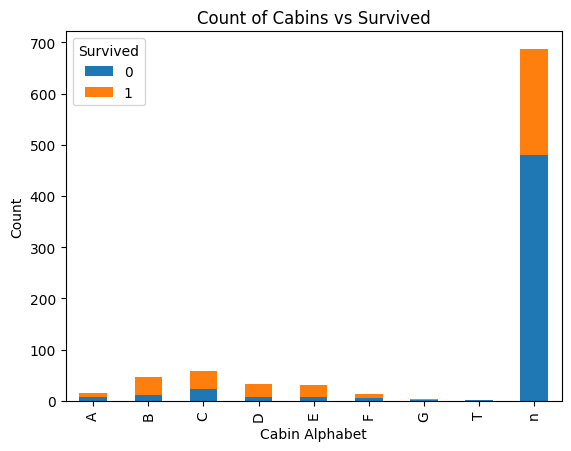

In [1392]:
x=train_data.copy()
x['Cabin'] = x['Cabin'].astype(str)
x["Cabin"]=x["Cabin"].apply(lambda x:x[0])
grouped_data = x.groupby(['Cabin', 'Survived']).size().unstack()

grouped_data.plot(kind='bar', stacked=True)

# Set the plot title and labels
plt.title('Count of Cabins vs Survived')
plt.xlabel('Cabin Alphabet')
plt.ylabel('Count')

# Show the plot
plt.show()

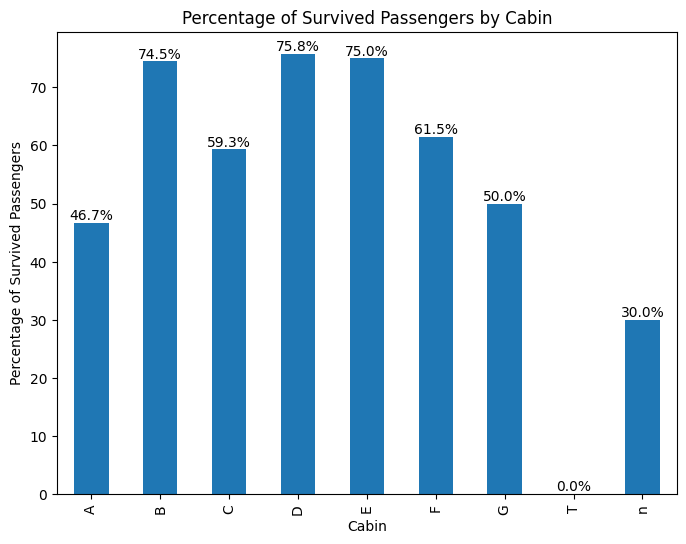

In [1393]:
grouped_data = x.groupby('Cabin')['Survived'].mean() * 100

# Plotting the graph
ax = grouped_data.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Cabin')
plt.ylabel('Percentage of Survived Passengers')
plt.title('Percentage of Survived Passengers by Cabin')

# Add numerical values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

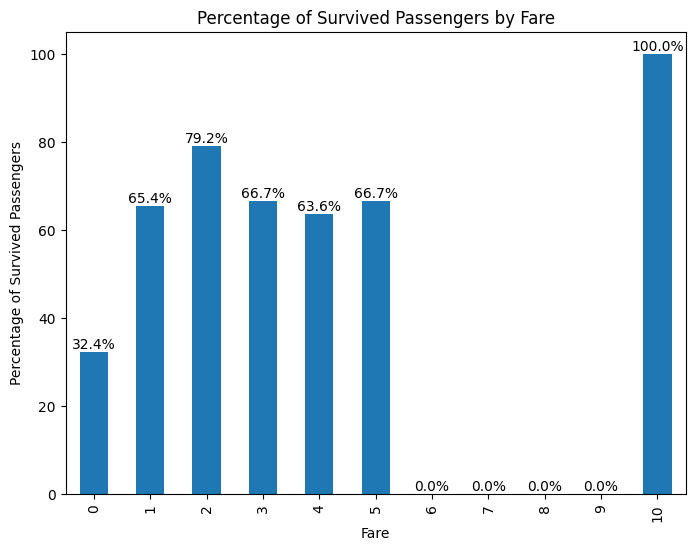

In [1394]:
x["Fare"]=pd.cut(x["Fare"],bins=[0,50,100,150,200,250,300,350,400,450,500,550],labels=[0,1,2,3,4,5,6,7,8,9,10])
grouped_data = x.groupby('Fare')['Survived'].mean() * 100

# Plotting the graph
ax = grouped_data.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Fare')
plt.ylabel('Percentage of Survived Passengers')
plt.title('Percentage of Survived Passengers by Fare')

# Add numerical values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

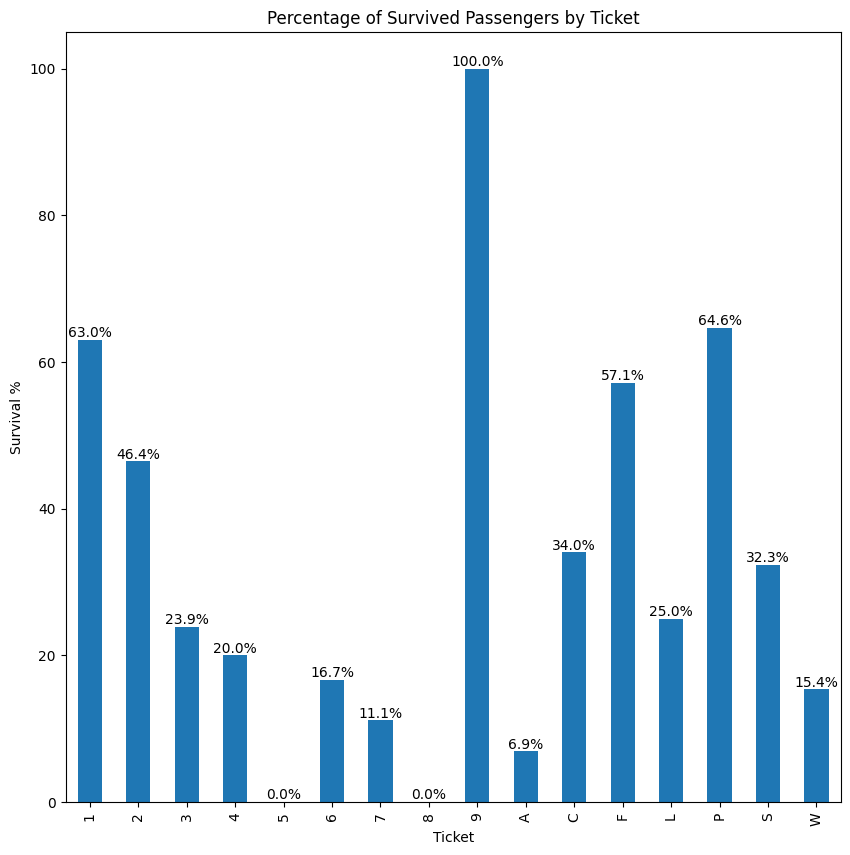

In [1395]:
x["Ticket"]=x["Ticket"].astype(str)
x["Ticket"]=x["Ticket"].apply(lambda x:x[0])

grouped_data=x.groupby("Ticket")["Survived"].mean()*100

ax=grouped_data.plot(kind="bar",figsize=(10,10))

plt.xlabel("Ticket")
plt.ylabel("Survival %")

plt.title('Percentage of Survived Passengers by Ticket')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

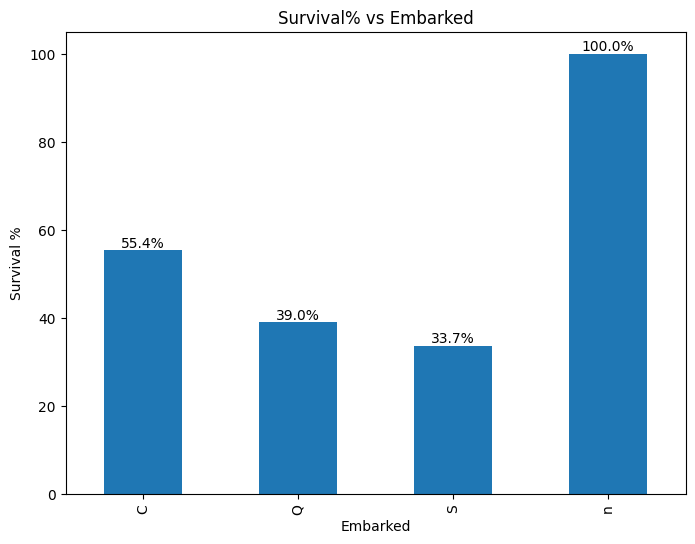

In [1396]:
x["Embarked"]=x["Embarked"].astype(str)
x["Embarked"]=x["Embarked"].apply(lambda x:x[0])

grouped_data=x.groupby("Embarked")["Survived"].mean()*100 

ax=grouped_data.plot(kind="bar",figsize=(8,6))

plt.xlabel("Embarked")
plt.ylabel("Survival %")
plt.title("Survival% vs Embarked")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
plt.show()

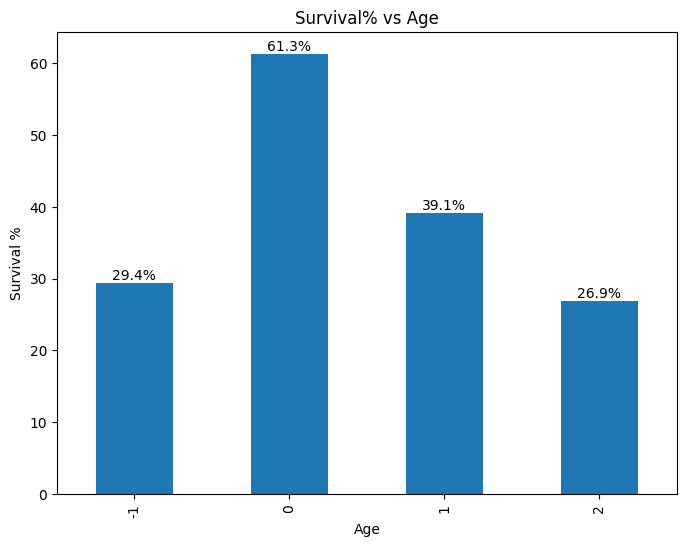

In [1397]:
x["Age"]=x["Age"].fillna(-1)
x["Age"]=pd.cut(x["Age"],bins=[-1,0,10,60,200],labels=[-1,0,1,2],right=False)

grouped_data=x.groupby("Age")["Survived"].mean()*100 

ax=grouped_data.plot(kind="bar",figsize=(8,6))

plt.xlabel("Age")
plt.ylabel("Survival %")
plt.title("Survival% vs Age")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
plt.show()

In [1398]:
test_data=pd.read_csv("F:\\PYTHON\\Datasets\\test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [1399]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1400]:
# Create a combined dataset of training and test data
combined_data = pd.concat([pd.DataFrame(train_data), pd.DataFrame(test_data)])

combined_data=combined_data.drop("Age",axis=1)

combined_data['Ticket'] = combined_data['Ticket'].astype(str)

combined_data["Name"]=combined_data["Name"].apply(lambda x:1 if "Mr." in x else 0)
#combined_data['Name'] = combined_data['Name'].apply(lambda x: 0 if 'Mr.' in x else (1 if ('Mrs.' in x or 'Ms.' in x) else (2 if 'Miss.' in x else 3)))

combined_data["Fare"]=combined_data["Fare"].fillna(-1)
combined_data["Fare"]=pd.cut(combined_data["Fare"],bins=[-1,0,50,300,600],labels=[-1,0,1,2],right=False)

combined_data["Fare"]=combined_data["Fare"].astype(float)

combined_data['Cabin'] = combined_data['Cabin'].astype(str)
combined_data["Cabin"]=combined_data["Cabin"].apply(lambda x:ord(x[0]))

combined_data["Sex"]=combined_data['Sex'].apply(lambda x_value:1 if x_value=="male" else 0)
d={"C":0,"Q":1,"S":2,0:-1}
combined_data["Embarked"]=combined_data["Embarked"].fillna(0)
combined_data["Embarked"]=combined_data["Embarked"].apply(lambda x_value:d[x_value])


# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode the selected columns
columns_to_encode = ['Ticket']

for column in columns_to_encode:
    combined_data[column] = encoder.fit_transform(combined_data[column])

# Split the combined dataset back into training and test datasets
train_encoded = combined_data.iloc[:len(train_data)]
test_encoded = combined_data.iloc[len(train_data):]
train_encoded



,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,0,1,1,0,720,0.0,110,2
1,2,1.0,1,1,0,1,0,816,1.0,67,0
2,3,1.0,3,2,0,0,0,914,0.0,110,2
3,4,1.0,1,1,0,1,0,65,1.0,67,2
4,5,0.0,3,0,1,0,0,649,0.0,110,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,3,1,0,0,130,0.0,110,2
887,888,1.0,1,2,0,0,0,18,0.0,66,2
888,889,0.0,3,2,0,1,2,923,0.0,110,2
889,890,1.0,1,0,1,0,0,11,0.0,67,0


In [1401]:
x=train_encoded.drop(["Survived","PassengerId"],axis=1)
x

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,0,1,1,0,720,0.0,110,2
1,1,1,0,1,0,816,1.0,67,0
2,3,2,0,0,0,914,0.0,110,2
3,1,1,0,1,0,65,1.0,67,2
4,3,0,1,0,0,649,0.0,110,2
...,...,...,...,...,...,...,...,...,...
886,2,3,1,0,0,130,0.0,110,2
887,1,2,0,0,0,18,0.0,66,2
888,3,2,0,1,2,923,0.0,110,2
889,1,0,1,0,0,11,0.0,67,0


In [1402]:
x.iloc[61]  #iloc helps to return the row with the desired index

Pclass       1.0
Name         2.0
Sex          0.0
SibSp        0.0
Parch        0.0
Ticket      42.0
Fare         1.0
Cabin       66.0
Embarked    -1.0
Name: 61, dtype: float64

In [1403]:
test_encoded

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,NaN,3,0,1,0,0,376,0.0,110,1
1,893,NaN,3,1,0,1,0,582,0.0,110,2
2,894,NaN,2,0,1,0,0,184,0.0,110,1
3,895,NaN,3,0,1,0,0,366,0.0,110,2
4,896,NaN,3,1,0,1,1,338,0.0,110,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,0,1,0,0,711,0.0,110,2
414,1306,NaN,1,3,0,0,0,834,1.0,67,0
415,1307,NaN,3,0,1,0,0,872,0.0,110,2
416,1308,NaN,3,0,1,0,0,579,0.0,110,2


In [1404]:
#x[x["Embarked"]==(-1)] #return rows with Embarked values -1

In [1405]:
y=train_encoded["Survived"]
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [1406]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

# SPLIT TRAIN & TEST DATA

In [1407]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [1408]:
print(y.shape,y_train.shape,y_test.shape)

(891,) (801,) (90,)


# MODEL TRAINING

In [1409]:
#model=RandomForestClassifier() #loading the model

In [1410]:
#model.fit(x_train,y_train) #training the model

# MODEL EVALUATION

In [1411]:
'''
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("ACCURACY = ",test_data_accuracy)
'''

'\nx_test_prediction=model.predict(x_test)\ntest_data_accuracy=accuracy_score(x_test_prediction,y_test)\nprint("ACCURACY = ",test_data_accuracy)\n'

In [1412]:

model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1,
              max_delta_step=0, max_depth=7, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='cpu_predictor', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
model.fit(x_train,y_train)
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("ACCURACY = ",test_data_accuracy)


ACCURACY =  0.8555555555555555


In [1421]:
'''
model=SVC(kernel="linear",probability=True,random_state=3)
model.fit(x_train,y_train)
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("ACCURACY = ",test_data_accuracy)
'''

ACCURACY =  0.7888888888888889


In [1415]:
# Fine-tuning XGBC using GridSearchCV
'''
xgbc_param_grid = {'learning_rate': [0.1, 0.01, 0.001],
                   'max_depth': [3, 5, 7],
                   'n_estimators': [100, 200, 300]}
xgbc_grid_search = GridSearchCV(XGBClassifier(objective='binary:logistic',booster='gbtree'), xgbc_param_grid, scoring='accuracy', cv=5)
xgbc_grid_search.fit(x_train, y_train)
xgbc_best_params = xgbc_grid_search.best_params_
model = xgbc_grid_search.best_estimator_
model.fit(x_train,y_train)
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print("ACCURACY = ",test_data_accuracy)

print(xgbc_best_params)
'''

'\nxgbc_param_grid = {\'learning_rate\': [0.1, 0.01, 0.001],\n                   \'max_depth\': [3, 5, 7],\n                   \'n_estimators\': [100, 200, 300]}\nxgbc_grid_search = GridSearchCV(XGBClassifier(objective=\'binary:logistic\',booster=\'gbtree\'), xgbc_param_grid, scoring=\'accuracy\', cv=5)\nxgbc_grid_search.fit(x_train, y_train)\nxgbc_best_params = xgbc_grid_search.best_params_\nmodel = xgbc_grid_search.best_estimator_\nmodel.fit(x_train,y_train)\nx_test_prediction=model.predict(x_test)\ntest_data_accuracy=accuracy_score(y_test,x_test_prediction)\nprint("ACCURACY = ",test_data_accuracy)\n\nprint(xgbc_best_params)\n'

# BUILDING A PREDICTION SYSTEM

In [1416]:
file=pd.read_csv("F:\\PYTHON\\Datasets\\answer.csv")
file

,PassengerId,Survived


In [1417]:
file["PassengerId"]=test_encoded["PassengerId"]
file

,PassengerId,Survived
0,892,NaN
1,893,NaN
2,894,NaN
3,895,NaN
4,896,NaN
...,...,...
413,1305,NaN
414,1306,NaN
415,1307,NaN
416,1308,NaN


In [1418]:

test_x=test_encoded.drop(["Survived","PassengerId"],axis=1)

test_x



,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,0,1,0,0,376,0.0,110,1
1,3,1,0,1,0,582,0.0,110,2
2,2,0,1,0,0,184,0.0,110,1
3,3,0,1,0,0,366,0.0,110,2
4,3,1,0,1,1,338,0.0,110,2
...,...,...,...,...,...,...,...,...,...
413,3,0,1,0,0,711,0.0,110,2
414,1,3,0,0,0,834,1.0,67,0
415,3,0,1,0,0,872,0.0,110,2
416,3,0,1,0,0,579,0.0,110,2


In [1419]:
Survived=model.predict(test_x)
file["Survived"]=Survived
file

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1420]:
file.to_csv("Survived1.csv",index=False) #update the answer.csv and save it as Survived.csv 